                               **Internshala Python Electric Vehicle Data Analysis Project**
                               

# Video link - https://drive.google.com/file/d/1JyMfzHkq9-EVK8TOtmpPmsQVdpk51VwK/view?usp=sharing

In [95]:
#importing data using pandas
import pandas as pd

EV_df = pd.read_excel(r'C:\Users\LENOVO\Downloads\FEV-data-Excel.xlsx')
EV_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


In [3]:
#before moving onto the task and analysis, lets check the data to see if there are any nulls or not

EV_df.isnull().sum()

Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            1
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             8
Maximum load capacity [kg]                8
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   1
Acceleration 0-100 kph [s]      

In [4]:
# as I can see Type of brakes has null, lets find out

EV_df[EV_df['Type of brakes'].isnull()]

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
51,Mercedes-Benz EQV (long),Mercedes-Benz,EQV (long),339480,204,362,NaN,2WD (front),90.0,356,...,3500.0,865.0,6,5,17,160,NaN,NaN,110,28.2


I could have used EV_df[EV_df['Type of brakes'].fillna(EV_df[EV_df['Type of brakes'].mode()[0], inplace=True), to fill the
missing value with the most occuring value in that column however I am keep it as it is, as it's a categorical column
and there is just one NaN, so it is not critical. 

In [5]:

print(EV_df.shape)

(53, 25)


In [6]:
# Lets drop duplicates if any

EV_df = EV_df.drop_duplicates()
EV_df = EV_df.reset_index(drop=True) # it will arrange the row index correctly after dropping duplivcatws rows
len(EV_df)

53

No duplicates rows above

In [17]:
EV_df.describe()

,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Battery capacity [kWh],Range (WLTP) [km],Wheelbase [cm],Length [cm],Width [cm],Height [cm],Minimal empty weight [kg],Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,45.000000,45.000000,53.000000,53.000000,53.000000,53.000000,52.000000,50.00000,53.000000,44.000000
mean,246158.509434,269.773585,460.037736,62.366038,376.905660,273.581132,442.509434,186.241509,155.422642,1868.452830,2288.844444,520.466667,4.905660,4.849057,17.679245,178.169811,445.096154,7.36000,113.509434,18.994318
std,149187.485190,181.298589,261.647000,24.170913,118.817938,22.740518,48.863280,14.280641,11.275358,470.880867,557.796026,140.682848,0.838133,0.455573,1.868500,43.056196,180.178480,2.78663,57.166970,4.418253
min,82050.000000,82.000000,160.000000,17.600000,148.000000,187.300000,269.500000,164.500000,137.800000,1035.000000,1310.000000,290.000000,2.000000,3.000000,14.000000,123.000000,171.000000,2.50000,22.000000,13.100000
25%,142900.000000,136.000000,260.000000,40.000000,289.000000,258.800000,411.800000,178.800000,148.100000,1530.000000,1916.000000,440.000000,5.000000,5.000000,16.000000,150.000000,315.000000,4.87500,100.000000,15.600000
50%,178400.000000,204.000000,362.000000,58.000000,364.000000,270.000000,447.000000,180.900000,155.600000,1685.000000,2119.000000,486.000000,5.000000,5.000000,17.000000,160.000000,425.000000,7.70000,100.000000,17.050000
75%,339480.000000,372.000000,640.000000,80.000000,450.000000,290.000000,490.100000,193.500000,161.500000,2370.000000,2870.000000,575.000000,5.000000,5.000000,19.000000,200.000000,558.000000,9.37500,150.000000,23.500000
max,794000.000000,772.000000,1140.000000,100.000000,652.000000,327.500000,514.000000,255.800000,191.000000,2710.000000,3500.000000,1056.000000,8.000000,5.000000,21.000000,261.000000,870.000000,13.10000,270.000000,28.200000


`Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range
of 400 km.
a) Your task is to filter out EVs that meet these criteria.(2 Marks)
b) Group them by the manufacturer (Make).(6 marks)
c) Calculate the average battery capacity for each manufacturer. (8 Marks)`



In [25]:
# Task 1 (a)

''' I had ensured using .info() function to see the dtypes were correct or not however for better safety as
is a large data I will use pd.numeric pandas function to esnure if there are any commas, the 
value gets converted into numeric'''

for i in ['Minimal price (gross) [PLN]', 'Range (WLTP) [km]']:
    EV_df[i] = pd.to_numeric(EV_df[i], errors='coerce') #coerce is a way of handling errors, like if there are any commas, the value will turn NaN
    # instead of causing errors

Customer_Car_requirement = EV_df[(EV_df['Minimal price (gross) [PLN]'] <= 350000) & (EV_df['Range (WLTP) [km]'] >= 400)]
Customer_Car_requirement.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70


I first converted the Minimal price (gross) [PLN] and Range (WLTP) [km] columns to numeric to avoid any dtype errors
and then filtered the data according to the customer's needs. 


In [31]:
# Task 1 (b) b) Group them by the manufacturer (Make).


grouped_by_make = Customer_Car_requirement.groupby('Make').size().sort_values(ascending=False)
print(grouped_by_make)


Make
Volkswagen       3
Tesla            3
Kia              2
Hyundai          1
BMW              1
Audi             1
Mercedes-Benz    1
dtype: int64


I grouped the filtered data to check which brand offer more EV's to meet the needs of the customer.
I can check Volkswagen and Tesla offering the highest number of Ev's followed by Kia.

In [39]:
# Task 1 (c) Calculate the average battery capacity for each manufacturer.

Average_capacity = Customer_Car_requirement.groupby('Make')['Battery capacity [kWh]'].mean().round(2).sort_values(ascending=False)
print(Average_capacity)

Make
Audi             95.00
BMW              80.00
Mercedes-Benz    80.00
Volkswagen       70.67
Tesla            68.00
Hyundai          64.00
Kia              64.00
Name: Battery capacity [kWh], dtype: float64


For the above task I grouped the filtered data by Make and did average aggregation, I used .round(2) to get only
2 decimals after the mean. So here I can check Audi has the most battery capacity followed by BMW and Mercedes. 
We can suggest the customer to buy Audi.

Task 2: You suspect some EVs have unusually high or low energy consumption. Find the
outliers in the mean - Energy consumption [kWh/100 km] column.(16 Marks)

In [24]:
EV_df['mean - Energy consumption [kWh/100 km]']

0     24.45
1     23.80
2     27.55
3     23.30
4     23.85
5     27.20
6     13.10
7     14.30
8     18.80
9       NaN
10    15.60
11    17.20
12    17.50
13    13.80
14    15.00
15    15.40
16    21.20
17    15.30
18    15.90
19    15.60
20    15.70
21    14.50
22    21.85
23    16.75
24    18.50
25    17.10
26    16.65
27    17.60
28    16.40
29      NaN
30    23.40
31    24.10
32    24.85
33    25.10
34    16.50
35    16.50
36    15.45
37    16.35
38    17.00
39      NaN
40      NaN
41      NaN
42      NaN
43      NaN
44      NaN
45      NaN
46    14.00
47    15.40
48    15.90
49    18.00
50    25.20
51    28.20
52    25.90
Name: mean - Energy consumption [kWh/100 km], dtype: float64

In [33]:
# Lets first remove the null values

r = 'mean - Energy consumption [kWh/100 km]'

Cleaned_Energy = EV_df[r].dropna()


In [34]:
Cleaned_Energy.isnull().sum()

np.int64(0)

In [36]:
# Now I will find Q1 and Q3. Q2 is the median

Q1 = Cleaned_Energy.quantile(0.25)
Q3 = Cleaned_Energy.quantile(0.75)

# Finding IQR

IQR = Q3 - Q1

# Finding boundries of outliers

Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

# Finding Outliers omn the full dataset

Outliers = EV_df[(EV_df[r] < Lower_bound) | (EV_df[r] > Upper_bound)][['Car full name', 'Make', 'Model', r]] 
print(Outliers)

Empty DataFrame
Columns: [Car full name, Make, Model, mean - Energy consumption [kWh/100 km]]
Index: []


Using 1.5 I could not find outliers, changing values to 1.3


In [37]:
Lower_bound2 = Q1 - 1.3*IQR
Upper_bound2 = Q3 + 1.3*IQR

Outliers2 = EV_df[(EV_df[r] < Lower_bound2) | (EV_df[r] > Upper_bound2)][['Car full name', 'Make', 'Model', r]] 
print(Outliers2)

Empty DataFrame
Columns: [Car full name, Make, Model, mean - Energy consumption [kWh/100 km]]
Index: []


In [38]:
# Using 1.3 I could not find anything, using 1.1

Lower_bound3 = Q1 - 1.1*IQR
Upper_bound3 = Q3 + 1.1*IQR

Outliers3 = EV_df[(EV_df[r] < Lower_bound3) | (EV_df[r] > Upper_bound3)][['Car full name', 'Make', 'Model', r]] 
print(Outliers3)

Empty DataFrame
Columns: [Car full name, Make, Model, mean - Energy consumption [kWh/100 km]]
Index: []


<Figure size 700x500 with 0 Axes>

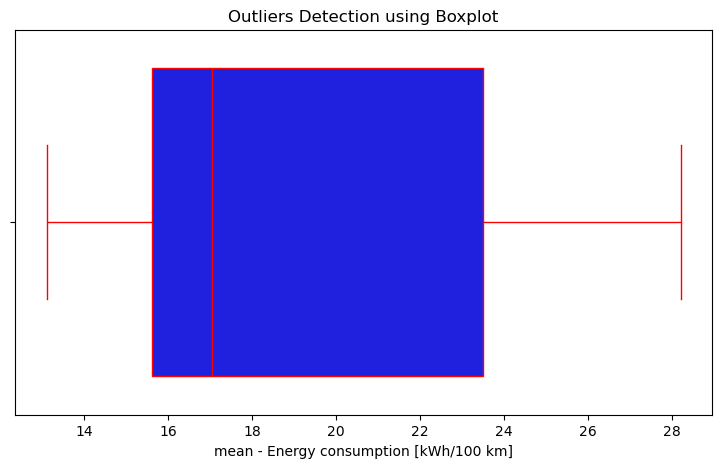

In [45]:
## Using Box plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
plt.figure(figsize=(9,5))
sns.boxplot(x=EV_df['mean - Energy consumption [kWh/100 km]'], y=None, color='blue', saturation=0.75, linecolor='red')
plt.title('Outliers Detection using Boxplot')
plt.show()

For Task 2 I used the IQR method, I had taken the standard 1.5 IQR rule, then a stricter 1.3 IQR and 1.1 IQR however no ouliers detected. Then for confirmation I used boxplot, then also I could not find any extreme values hence 'mean - Energy consumption [kWh/100 km]' column has no outliers. 

In [48]:
''' Task 3: Your manager wants to know if there's a strong relationship between battery
capacity and range.'''

# As I have checked both battery capacity and range are numerical columns, for this t test paired sample will be the best

EV_df[['Battery capacity [kWh]', 'Range (WLTP) [km]']].isnull().sum()


Battery capacity [kWh]    0
Range (WLTP) [km]         0
dtype: int64

In [49]:
# Step 1 - Null Hypothesis - No relation
# Alternative Hypothesis - There is a relation

from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(EV_df['Battery capacity [kWh]'], EV_df['Range (WLTP) [km]'])

print(f't_stat is {t_stat} and p_value is {p_value}')


t_stat is -22.845347089287355 and p_value is 8.868036810160167e-29


From the above test, we got p_value of 8.868036810160167e-29 which is far less than 0.05, so we reject the null hypothesis.
We can say there is a strong relation between battery capacity and range columns. 
So it means when the battery capacity increases, the range also increases.

In [50]:
# Now I use use correlation to confirm the result

import numpy as np

relation = np.corrcoef(EV_df['Battery capacity [kWh]'],  EV_df['Range (WLTP) [km]'])
print(relation)

[[1.         0.81043858]
 [0.81043858 1.        ]]


From the numpy correlation test I found out the relation is 0.81, which is very strong. We can now confirm that 
there is a strong relation between battery capacity and range columns. 

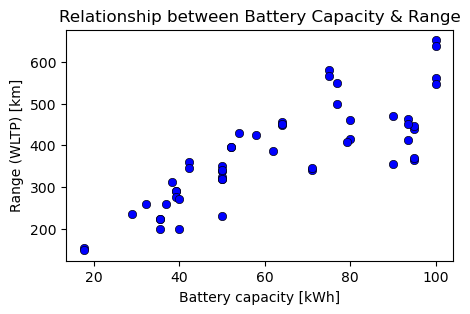

In [54]:
# Using a scatter plot to show relation as there are two numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.scatterplot(x=EV_df['Battery capacity [kWh]'], y=EV_df['Range (WLTP) [km]'], color='blue', edgecolor='black')
plt.title('Relationship between Battery Capacity & Range')
plt.show()

We can see as battery capacity increasing, range is also increasing. Thus there is a postive relation between them. 

Task 4: Build an EV recommendation class. The class should allow users to input their
budget, desired range, and battery capacity. The class should then return the top three EVs
matching their criteria.

In [56]:
class EV_recommendation: #class
    def __init__(self, customerbudget, customerrange, customercapacity):
        self.budget = customerbudget
        self.range = customerrange
        self.capacity = customercapacity

    # creating function to call top 3
    def top3(self, EV_df):
        needs = EV_df[(EV_df['Minimal price (gross) [PLN]'] <= self.budget) & (EV_df['Range (WLTP) [km]'] >= self.range)
        & (EV_df['Battery capacity [kWh]'] >= self.capacity)]
        return needs[['Car full name', 'Make', 'Model', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]',
                      'Battery capacity [kWh]']].sort_values(by=['Minimal price (gross) [PLN]', 'Range (WLTP) [km]',
                                                  'Battery capacity [kWh]'], ascending=[True, False, False]).head(3)             
                

In [57]:
# creating 2 objects
customer1 = EV_recommendation(350000, 400, 50)
customer2 = EV_recommendation(459999, 500, 70)

In [59]:
customer1.top3(EV_df) #calling the function


,Car full name,Make,Model,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,425,58.0
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,452,64.0
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,455,64.0


In [60]:
customer2.top3(EV_df)

,Car full name,Make,Model,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,179990,549,77.0
49,Volkswagen ID.4 1st,Volkswagen,ID.4 1st,202390,500,77.0
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,580,75.0


In [84]:
## This is just an addition just to check my knowledge. Adding a child class, so that customer can choose a brand if he/she wants


class EV_recommendation:
    def __init__(self, customerbudget, customerrange, customercapacity):
        self.__budget = customerbudget #private encapsulation, cannot be used in sub class
        self.range = customerrange
        self.capacity = customercapacity

    # getter method to use budget inside sub class
    @property # its an in built python decorator, I used it so that i dont have to use () after budget
    def get_budget(self):
        return self.__budget
          
# adding child class
class premiumEV_recommendation(EV_recommendation):
    def __init__(self, customerbudget, customerrange, customercapacity, customerbrand=None):
        super().__init__(customerbudget, customerrange, customercapacity)
        self.brand = customerbrand


    # creating function to call top 3
    def top3(self, EV_df):
        needs = EV_df[(EV_df['Minimal price (gross) [PLN]'] <= self.get_budget) & (EV_df['Range (WLTP) [km]'] >= self.range)
        & (EV_df['Battery capacity [kWh]'] >= self.capacity)]
        
        # this will run only if customer passed a brand. Thats why I used customerbrand=None.
        if self.brand:
            check = needs['Make'].str.lower() == self.brand.lower()
            needs = needs[check]
            if not check.any(): # if true then run the below codes. Means if brand not with us then.
                brand = EV_df['Make'].unique()
                return f'That brand is not available with us. Brand available with us are {brand}'
        

        # This will always run even if the customer doesnt choose a brand  
        return needs[['Car full name', 'Make', 'Model', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]',
                      'Battery capacity [kWh]']].sort_values(by=['Minimal price (gross) [PLN]', 'Range (WLTP) [km]',
                                                  'Battery capacity [kWh]'], ascending=[True, False, False]).head(3)

            
            

In [85]:
# creating objects. Object 1 with brand
customer1 = premiumEV_recommendation(350000, 400, 50, 'audi')
customer1.top3(EV_df)


,Car full name,Make,Model,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,438,95.0


In [86]:
#object 2. Without brand
customer2 = premiumEV_recommendation(459999, 500, 70)
customer2.top3(EV_df)




,Car full name,Make,Model,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,179990,549,77.0
49,Volkswagen ID.4 1st,Volkswagen,ID.4 1st,202390,500,77.0
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,580,75.0


In [88]:
# wrong brand passed Object 3

customer3 = premiumEV_recommendation(459999, 500, 70, 'ratnajit')
customer3.top3(EV_df)



"That brand is not available with us. Brand available with us are ['Audi' 'BMW' 'Citroën' 'DS' 'Honda' 'Hyundai' 'Jaguar' 'Kia' 'Mazda'\n 'Mercedes-Benz' 'Mini' 'Nissan' 'Opel' 'Peugeot' 'Porsche' 'Renault'\n 'Skoda' 'Smart' 'Tesla' 'Volkswagen']"

So in the above task, I used the concept of Encapsulation, used single inheritance concept of OOP.

Task 5: Inferential Statistics – Hypothesis Testing: Test whether there is a significant
difference in the average Engine power [KM] of vehicles manufactured by two leading
manufacturers i.e. Tesla and Audi. What insights can you draw from the test results?
Recommendations and Conclusion: Provide actionable insights based on your analysis.
(Conduct a two sample t-test using ttest_ind from scipy.stats module)

In [98]:
# So in this task I will be using t-test two sample because I have to compare two groups.
# More than two groups use Annova

EV_df[['Make', 'Engine power [KM]']].isnull().sum()

Make                 0
Engine power [KM]    0
dtype: int64

In [99]:
Tesla = EV_df[EV_df['Make'] == 'Tesla']['Engine power [KM]']
Audi = EV_df[EV_df['Make'] == 'Audi']['Engine power [KM]']

In [100]:
# Null Hypothesis = No differenvce
# Alternative Hypothesis = There is a differenvce

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(Tesla, Audi, equal_var=False) #equal_var= False means variance of both variable are not same

print(f't_stat is {t_stat} and p_value is {p_value}')

t_stat is 1.7939951827297178 and p_value is 0.10684105068839565


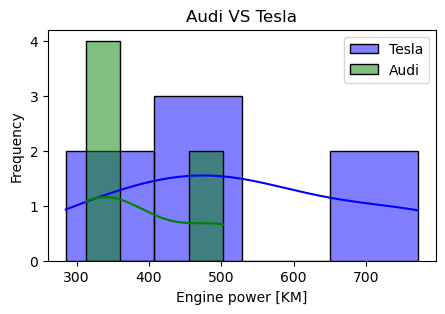

In [107]:
## Visulisation

plt.figure(figsize=(5,3))
sns.histplot(Tesla, color='blue', edgecolor='black', label='Tesla', kde=True)
sns.histplot(Audi, color='green', edgecolor='black', label='Audi', kde=True)
plt.legend()
plt.title('Audi VS Tesla')
plt.ylabel('Frequency')
plt.show()

Result of Task 5: My p_value is 0.10 which is above 0.05, so it failed to reject null hypothesis, hence
there is no significant difference.
It signifies both brand are delivering same performance in terms of Engine power.
My recommendation will be that brands like Audi, Tesla they can focus more on automation, range, energy efficiency and
provide more affordable cars to customer so that ther sale can increase. 


# Thank you